In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
team=pd.read_csv(r'/Users/andyhsu/Desktop/python基礎/requests/pleauge/pleaguedata.csv')

In [3]:
team

,球隊,出賽次數,時間 (分),兩分命中,兩分出手,兩分%,三分命中,三分出手,三分%,罰球命中,罰球出手,罰球%,得分,攻板,防板,籃板,助攻,抄截,阻攻,失誤,犯規
0,臺北富邦勇士,24,240:00,28.04,55.83,50.22%,9.83,30.92,31.81%,16.17,23.63,68.43%,101.75,15.21,38.42,53.63,22.67,9.92,3.79,16.83,17.38
1,桃園領航猿,24,240:00,24.88,51.38,48.42%,10.71,33.21,32.25%,13.50,20.58,65.59%,95.38,12.71,35.96,48.67,22.54,8.96,4.50,18.58,20.33
2,福爾摩沙台新夢想家,24,240:00,19.96,43.29,46.1%,13.63,42.63,31.96%,15.13,21.00,72.02%,95.92,10.17,33.13,43.29,16.92,9.75,2.71,12.04,21.33
3,新竹街口攻城獅,24,240:00,26.17,56.88,46.01%,8.42,28.50,29.53%,17.42,26.46,65.83%,95.00,13.46,35.00,48.46,22.21,10.79,4.63,15.63,21.96


In [4]:
team=team.iloc[:,[0,5,8,11,12,15,16,17,18,19,20]]

In [5]:
team

,球隊,兩分%,三分%,罰球%,得分,籃板,助攻,抄截,阻攻,失誤,犯規
0,臺北富邦勇士,50.22%,31.81%,68.43%,101.75,53.63,22.67,9.92,3.79,16.83,17.38
1,桃園領航猿,48.42%,32.25%,65.59%,95.38,48.67,22.54,8.96,4.50,18.58,20.33
2,福爾摩沙台新夢想家,46.1%,31.96%,72.02%,95.92,43.29,16.92,9.75,2.71,12.04,21.33
3,新竹街口攻城獅,46.01%,29.53%,65.83%,95.00,48.46,22.21,10.79,4.63,15.63,21.96


In [6]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   球隊      4 non-null      object 
 1   兩分%     4 non-null      object 
 2   三分%     4 non-null      object 
 3   罰球%     4 non-null      object 
 4   得分      4 non-null      float64
 5   籃板      4 non-null      float64
 6   助攻      4 non-null      float64
 7   抄截      4 non-null      float64
 8   阻攻      4 non-null      float64
 9   失誤      4 non-null      float64
 10  犯規      4 non-null      float64
dtypes: float64(7), object(4)
memory usage: 480.0+ bytes


In [7]:
for x in ['兩分%','三分%','罰球%']:
    team[x]=team[x].str.replace('%','')
    team[x]=team[x].astype('float64')

<ipython-input-7-22315a49140d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[x]=team[x].str.replace('%','')
<ipython-input-7-22315a49140d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[x]=team[x].astype('float64')


In [8]:
teamname=team.iloc[:,0]
teamdata=team.drop(columns='球隊')

In [9]:
teamdata

,兩分%,三分%,罰球%,得分,籃板,助攻,抄截,阻攻,失誤,犯規
0,50.22,31.81,68.43,101.75,53.63,22.67,9.92,3.79,16.83,17.38
1,48.42,32.25,65.59,95.38,48.67,22.54,8.96,4.50,18.58,20.33
2,46.10,31.96,72.02,95.92,43.29,16.92,9.75,2.71,12.04,21.33
3,46.01,29.53,65.83,95.00,48.46,22.21,10.79,4.63,15.63,21.96


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
teamdata=sc.fit_transform(teamdata)

In [11]:
teamdata

array([[ 1.44512257,  0.38974974,  0.17848606,  1.71981104,  1.39941974,
         0.65753909,  0.09998521, -0.15425597,  0.44251062, -1.63441915],
       [ 0.41798708,  0.79564296, -0.9175148 , -0.59263146,  0.04306959,
         0.60360844, -1.37671944,  0.77784394,  1.17307061,  0.04555872],
       [-0.90587644,  0.52812243,  1.56392376, -0.39660022, -1.4281328 ,
        -1.7278551 , -0.16151457, -1.5720981 , -1.55713644,  0.61504275],
       [-0.95723321, -1.71351513, -0.82489501, -0.73057936, -0.01435653,
         0.46670756,  1.4382488 ,  0.94851013, -0.0584448 ,  0.97381768]])

In [12]:
cov=np.cov(teamdata.T)

In [13]:
cov

array([[ 1.33333333e+00,  6.85874854e-01, -2.50893297e-01,
         1.09874370e+00,  1.11593000e+00,  7.73666789e-01,
        -5.53795776e-01,  2.06130388e-01,  8.65442990e-01,
        -1.27740547e+00],
       [ 6.85874854e-01,  1.33333333e+00,  5.26321334e-01,
         4.13726059e-01, -4.99791132e-02, -3.25232332e-01,
        -1.20205616e+00, -6.32260630e-01,  1.27867049e-01,
        -6.48199809e-01],
       [-2.50893297e-01,  5.26321334e-01,  1.33333333e+00,
         2.77703060e-01, -6.70462754e-01, -1.17455884e+00,
        -5.26647684e-02, -1.32742624e+00, -1.12811984e+00,
        -5.83130708e-02],
       [ 1.09874370e+00,  4.13726059e-01,  2.77703060e-01,
         1.33333333e+00,  9.86033167e-01,  3.72475484e-01,
         3.81580809e-04, -2.65244459e-01,  2.42031778e-01,
        -1.26442294e+00],
       [ 1.11593000e+00, -4.99791132e-02, -6.70462754e-01,
         9.86033167e-01,  1.33333333e+00,  1.13569220e+00,
         9.68808452e-02,  6.83060036e-01,  9.64806151e-01,
        -1.

In [14]:
eigen_vals,eigen_vecs=np.linalg.eig(cov)

In [15]:
print("values:\n",eigen_vals)
print("vectors:\n",eigen_vecs)

values:
 [ 6.68907130e+00+0.00000000e+00j  4.45453290e+00+0.00000000e+00j
  2.18972913e+00+0.00000000e+00j -4.31322206e-16+2.87425861e-16j
 -4.31322206e-16-2.87425861e-16j -4.12260624e-16+0.00000000e+00j
  9.28685467e-17+2.65954627e-17j  9.28685467e-17-2.65954627e-17j
 -1.84008146e-16+8.68186306e-17j -1.84008146e-16-8.68186306e-17j]
vectors:
 [[-0.37955633+0.j         -0.28799502+0.j         -0.01006036+0.j
  -0.00802301-0.18942391j -0.00802301+0.18942391j -0.07603185+0.j
   0.18944287-0.00408589j  0.18944287+0.00408589j -0.08293543-0.01543044j
  -0.08293543+0.01543044j]
 [-0.04263845+0.j         -0.45748848+0.j          0.42140547+0.j
  -0.37013852+0.28151661j -0.37013852-0.28151661j  0.22135893+0.j
  -0.10922217+0.03375338j -0.10922217-0.03375338j  0.02708341-0.0276822j
   0.02708341+0.0276822j ]
 [ 0.29593766+0.j         -0.38679937+0.j         -0.19239081+0.j
  -0.09161778-0.14788965j -0.09161778+0.14788965j  0.37767   +0.j
  -0.40170086+0.03526766j -0.40170086-0.03526766j  0.22723

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


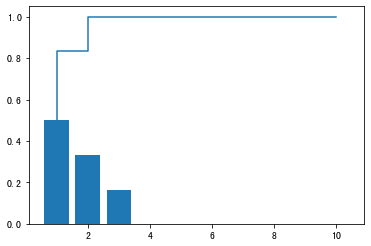

In [16]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]

cum_var_exp=np.cumsum(var_exp)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.bar(range(1,11),var_exp)
plt.step(range(1,11),cum_var_exp)

In [17]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[i]) for i in range(len(eigen_vals))]

In [18]:
eigen_pairs.sort(key=lambda x:x[0],reverse=True)

In [19]:
eigen_pairs

[(6.689071301685768,
  array([-0.37955633+0.j        , -0.28799502+0.j        ,
         -0.01006036+0.j        , -0.00802301-0.18942391j,
         -0.00802301+0.18942391j, -0.07603185+0.j        ,
          0.18944287-0.00408589j,  0.18944287+0.00408589j,
         -0.08293543-0.01543044j, -0.08293543+0.01543044j])),
 (4.454532903684379,
  array([-0.04263845+0.j        , -0.45748848+0.j        ,
          0.42140547+0.j        , -0.37013852+0.28151661j,
         -0.37013852-0.28151661j,  0.22135893+0.j        ,
         -0.10922217+0.03375338j, -0.10922217-0.03375338j,
          0.02708341-0.0276822j ,  0.02708341+0.0276822j ])),
 (2.1897291279631834,
  array([ 0.29593766+0.j        , -0.38679937+0.j        ,
         -0.19239081+0.j        , -0.09161778-0.14788965j,
         -0.09161778+0.14788965j,  0.37767   +0.j        ,
         -0.40170086+0.03526766j, -0.40170086-0.03526766j,
          0.22723042+0.25888922j,  0.22723042-0.25888922j])),
 (5.183169602288185e-16,
  array([-0.25174

In [20]:
eigen_vecs[:,0]

array([-0.37955633+0.j, -0.04263845+0.j,  0.29593766+0.j, -0.25174043+0.j,
       -0.42105807+0.j, -0.41161388+0.j,  0.08079751+0.j, -0.28845716+0.j,
       -0.40455578+0.j,  0.32101336+0.j])

In [21]:
w = np.vstack((eigen_vecs[:,0], eigen_vecs[:, 1]))  # 降維投影矩陣W

In [22]:
w

array([[-0.37955633+0.j, -0.04263845+0.j,  0.29593766+0.j,
        -0.25174043+0.j, -0.42105807+0.j, -0.41161388+0.j,
         0.08079751+0.j, -0.28845716+0.j, -0.40455578+0.j,
         0.32101336+0.j],
       [-0.28799502+0.j, -0.45748848+0.j, -0.38679937+0.j,
        -0.35129993+0.j, -0.03218408+0.j,  0.21173931+0.j,
         0.28298746+0.j,  0.40801475+0.j,  0.12119647+0.j,
         0.35724207+0.j]])

In [23]:
newdata=teamdata.dot(w.T)
newdata

array([[-2.45625399+0.j, -1.73841076+0.j],
       [-1.37705861+0.j,  0.29135631+0.j],
       [ 3.46433151+0.j, -1.42235895+0.j],
       [ 0.36898108+0.j,  2.8694134 +0.j]])

新竹街口攻城獅
桃園領航猿
福爾摩沙台新夢想家
臺北富邦勇士


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


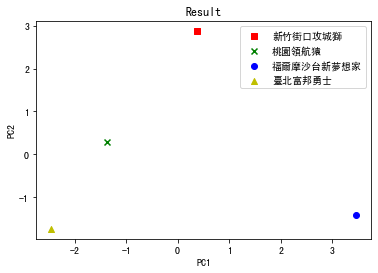

In [24]:
color=['r','g','b','y']
marker=['s','x','o','^']
for l, c, m in zip(np.unique(teamname), color, marker):
    plt.scatter(newdata[teamname == l,0],
                newdata[teamname == l,1],
                c=c,label=l,marker=m)
    print(l)
plt.title('Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

In [25]:
newdata

array([[-2.45625399+0.j, -1.73841076+0.j],
       [-1.37705861+0.j,  0.29135631+0.j],
       [ 3.46433151+0.j, -1.42235895+0.j],
       [ 0.36898108+0.j,  2.8694134 +0.j]])

In [26]:
newdata[teamname == '桃園領航猿',0]

array([-1.37705861+0.j])

In [27]:
dfw=pd.DataFrame(w)
dfw.index=['first','second']

In [28]:
dfw

,0,1,2,3,4,5,6,7,8,9
first,-0.379556+0.000000j,-0.042638+0.000000j,0.295938+0.000000j,-0.251740+0.000000j,-0.421058+0.000000j,-0.411614+0.000000j,0.080798+0.000000j,-0.288457+0.000000j,-0.404556+0.000000j,0.321013+0.000000j
second,-0.287995+0.000000j,-0.457488+0.000000j,-0.386799+0.000000j,-0.351300+0.000000j,-0.032184+0.000000j,0.211739+0.000000j,0.282987+0.000000j,0.408015+0.000000j,0.121196+0.000000j,0.357242+0.000000j
